# Probability distributions

Set Jupyter table style

In [2]:
%%html
<style>
table {margin-left: 20px !important;}
th {text-align: left !important;}
</style>

Import python modules

In [3]:
import matplotlib.pylab as plt
import numpy as np
from scipy import stats

### Table of Contents

I. [Background](#background)

II. [Discrete probability distributions](#discrete)

 | Distribution              | Parameters   | scipy.stats   |
 |:--------------------------|:------------:|:--------------|
 | [Binomial](#binom)        | n, p         | .binom        |
 | [Geometric](#geom)        | p            | .geom         |
 | [Hypergeometric](#hyperg) | M, n, N      | .hypergeom    |
 | [Poisson](#poisson)       | $\mu$        | .poisson      | 

III. [Continuous probability distributions](#continuous)

| Distribution              | Parameters   | scipy.stats   |
|:--------------------------|:------------:|:--------------|
| [Uniform](#uni)           |              |               |
| [Exponential](#expo)      | $\mu$        | .expon        |
| [Normal](#normal)         | $\mu, \sigma$| .norm         |
| [Student's t](#tdist)     | df           | .t            |

IV. [Common scipy.stats distribution methods](#scipy)

V. [Sources](#sources)

##  Background<a class="anchor" id="background"></a>

A **random variable** discribes all of the possible numerical outcomes of a random phenomenon.

A statistical experiment determines a specific value of a random variable which can chage on repitition of the experiment. A **probability distribution** gives all posssible values of a random variable and their corresponding probabilities.   

Uppercase X, Y denote random variables (a description given as text) <br>
Lowercase x, y denote a value of a random variable (an instance given as a number)

## Discrete probability distributions <a class="anchor" id="discrete"></a>

A **probability mass function (pmf)** gives the probability of a discrete random variable for different exact values. Each probability is between 0 and 1, inclusive. The sum of the probabilities is 1. *Note: pmfs are also sometimes called probability distribution functions which gives the same acronym used for probability density functions (pdf), the analogous functions of continous probability distributions.* 

A **cumulative distribution function (cdf)** gives the probability that a random variable is less than or equal to a given value.

### Binomial  <a class="anchor" id="binom"></a> 

X ~ B(n, p)<br>

A discrete random variable that gives the distribution of the number of successes in **n** independent and identically distributed Bernoulli trials with probability of success **p**

In [66]:
# Illowsky - example 4.15 part b 
# Mean and variance 
n = 200
p = 0.0128
mean, var = stats.binom.stats(n, p)
mean_formula = n * p
std_dev = np.sqrt(var)
std_dev_formula = np.sqrt(n * p * (1 - p)) 
print('Binomial distribution (n={0}, p={1})'.format(n, p))
print(' mean    = {0:.4f} (calculated by scipy)'.format(mean))
print(' mean    = {0:.4f} (calculated as n * p)'.format(mean_formula))
print(' std dev = {0:.4f} (calculated from scipy variance)'.format(std_dev))
print(' std dev = {0:.4f} (calculated as (sqrt(npq)))'.format(std_dev_formula))

Binomial distribution (n=200, p=0.0128)
 mean    = 2.5600 (calculated by scipy)
 mean    = 2.5600 (calculated as n * p)
 std dev = 1.5897 (calculated from scipy variance)
 std dev = 1.5897 (calculated as (sqrt(npq)))


In [67]:
# cumulative density function and probability mass function 
x = 8
print(' probability of {0} or less successes = {1:.4f}'.format(x, stats.binom.cdf(x, n, p))) # prob <= x

for x in [5, 6]:
    print(' probability of exactly {0} successes = {1:.4f}'.format(x, stats.binom.pmf(x, n, p))) # prob = x

 probability of 8 or less successes = 0.9988
 probability of exactly 5 successes = 0.0707
 probability of exactly 6 successes = 0.0298


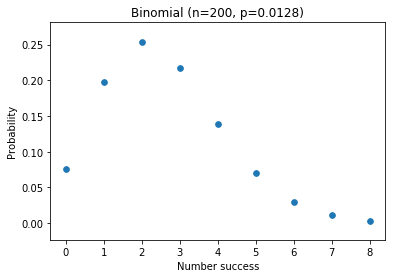

In [69]:
# graph binomial 
n = 200
p = 0.0128

# x = np.arange(0, n) # entire range not practile
# Instead chose range within some probability threshold
x = np.arange(stats.binom.ppf(0.001, n, p), stats.binom.ppf(0.999, n, p))

plt.figure()
plt.scatter(x, stats.binom.pmf(x, n, p), s=32)
plt.title('Binomial (n={0}, p={1})'.format(n, p))
plt.xlabel('Number success')
plt.ylabel('Probability')
plt.show()
plt.close()

# Alternatively, the distribution object can be called (as a function) to fix the shape and location.
# This returns a “frozen” RV object holding the given parameters fixed.

In [58]:
# Generate list of random numbers from binomial
n = 200
p = 0.0128
r = stats.binom.rvs(n, p, size=20)
print(r)

[1 4 2 2 3 6 3 4 2 2 1 5 2 2 4 3 0 3 6 1]


### Geometric <a class="anchor" id="geom"></a>

X ~ G(p)

A discrete random variable that gives the distribution of the number of independent trials before the first success occurs for independent Bernoulli trials with constant probability of success **p**. *Note: success is only semantic, works equally with 'failure' as long as associated probability is used* 

In [59]:
# Illowsky - example 4.18
# mean and variance
p = 0.35
mean, var = stats.geom.stats(p)
print('Geometric distribution (p = {0})'.format(p))
print(' mean    = {0:.4f}'.format(float(mean)))
print(' std dev = {0:.4f}'.format(np.sqrt(var)))

Geometric distribution (p = 0.35)
 mean    = 2.8571
 std dev = 2.3035


In [61]:
# cumulative density function and probability mass function 
n = 3
print(' probability first success occurs at exactly {0} trials = {1:.4f}'.format(n, stats.geom.pmf(n, p)))
print(' probability first success occurs within {0} trials = {1:.4f}'.format(n, stats.geom.cdf(n, p)))

 probability first success occurs at exactly 3 trials = 0.1479
 probability first success occurs within 3 trials = 0.7254


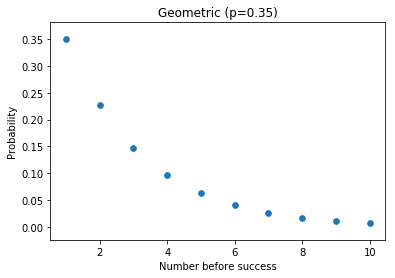

In [33]:
# graph Geometric 
p = 0.35

x = np.arange(stats.geom.ppf(0.01, p), stats.geom.ppf(0.99, p))

plt.figure()
plt.scatter(x, stats.geom.pmf(x, p), s=32)
plt.title('Geometric (p={0})'.format(p))
plt.xlabel('Number before success')
plt.ylabel('Probability')
plt.show()
plt.close()

In [36]:
# generate list of random numbers from geometric
p = 0.35
r = stats.geom.rvs(p, size=20)
print(r)

[1 1 2 2 1 4 4 1 2 3 2 3 1 1 4 1 1 3 2 1]


### Hypergeometric <a class="anchor" id="hyperg"></a>

X ~ H(M, n, N)

A discrete random variable that gives the distribution of the number of individuals from a subgroup expected in a sample taken without replacement.

Scipy notation: p(k, M, n, N). *Alternative notations are common* <br>
**k** = number of objects drawn from subgroup of interest (generally interested in p(k, M, n, N) vs. k) <br>
**M** = number of objects in population <br>
**n** = number of objects in subgroup of interest in the population <br>
**N** = sample size (number of objects draw without replacement)


In [70]:
# Illowsky - 4.25
# mean and variance

M = 6 + 5
n = 6
N = 4  
mean, var = stats.hypergeom.stats(M, n, N)
print('Hypergeometric distribution (M = {0}, n = {1}, N = {2})'.format(M, n, N))
print(' mean    = {0:.4f}'.format(float(mean) )) # Expected value from group of interest
print(' std dev = {0:.4f}'.format(np.sqrt(var)))

Hypergeometric distribution (M = 11, n = 6, N = 4)
 mean    = 2.1818
 std dev = 0.8332


In [54]:
# cumulative density function and probability mass function 
x = 2
print(' probability exactly {0} from group of interest = {1:.4f}'\
      .format(x, stats.hypergeom.pmf(x, M, n, N)))
print(' probability of {0} or less from group of interest = {1:.4f}'\
      .format(x, stats.hypergeom.cdf(x, M, n, N)))

 probability exactly 2 from group of interest = 0.4545
 probability of 2 or less from group of interest = 0.6515


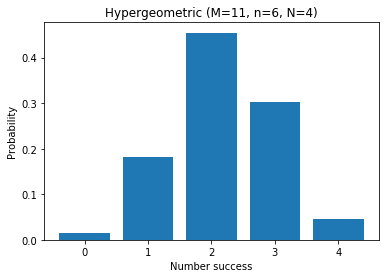

In [108]:
# graph hypergeometric
M = 6 + 5
n = 6
N = 4  

# For this case, just showing entire range makes more sence
# x = np.arange(stats.hypergeom.ppf(0.001, M, n, N), stats.hypergeom.ppf(0.999, M, n, N))
x = np.arange(0,5)

plt.figure()
plt.bar(x, stats.hypergeom.pmf(x, M, n, N))
plt.title('Hypergeometric (M={0}, n={1}, N={2})'.format(M, n, N))
plt.xlabel('Number success')
plt.ylabel('Probability')
plt.show()
plt.close()

### Poisson<a class="anchor" id="poisson"></a>

X ~ P($\mu$)

Probability of a number of occurances of a discrete, independent event given the average rate of that event, generally notated as $\mu$ or $\sigma$. *Note: the interval is defined by $\mu$ (i.e. per day vs. per year)*   

In [109]:
# Illowsky - Example 4.29
# mean and variance
mu = (6 / 2) * 0.25  # given rate (6 in 2 hr, interested in 15 min (0.25 hr) interval)
mean, var = stats.poisson.stats(mu)
std_dev = np.sqrt(var)
print('Poisson (mu = {0})'.format(mu))
print(' mean    = {0:.4f}'.format(mean))
print(' std dev = {0:.4f}'.format(std_dev))

Poisson (mu = 0.75)
 mean    = 0.7500
 std dev = 0.8660


In [110]:
# cumulative density function and probability mass function 
x = 1

print(' probability of {0} or less = {1:.4f}'.format(x, stats.poisson.cdf(x, mu))) # prob <= x
print(' probability of exactly {0} = {1:.4f}'.format(x, stats.poisson.pmf(x, mu))) # prob = x
print(' probability of more than {0} = {1:.4f}'.format(x, stats.poisson.sf(x, mu))) 
# (1 - .cdf) = .sf, but .sf method is more accurate
print(' probability of more than {0} = {1:.4f} (alternative calculation)'.\
      format(x, 1 - stats.poisson.cdf(x, mu))) # prob < x

 probability of 1 or less = 0.8266
 probability of exactly 1 = 0.3543
 probability of more than 1 = 0.1734
 probability of more than 1 = 0.1734 (alternative calculation)


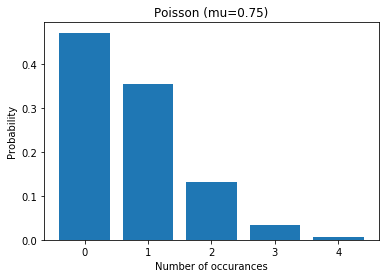

In [107]:
# graph Poisson

x = np.arange(stats.poisson.ppf(0.01, mu), stats.poisson.ppf(0.999, mu))

plt.figure()
plt.bar(x, stats.poisson.pmf(x, mu))
plt.title('Poisson (mu={0})'.format(mu))
plt.xlabel('Number of occurances')
plt.ylabel('Probability')
plt.show()
plt.close()

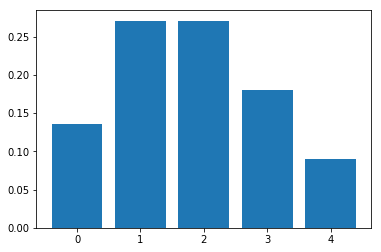

In [113]:
# Poisson using equation rather than scipy method

k_range = range(5)     #  list of k (numer of events) to look at
lamb = 2               #  (events per interval (i.e. 1 per 100 years))

p_k = [((np.e ** -lamb) * (lamb ** k)) / np.math.factorial(k) for k in k_range]

plt.figure()
plt.bar(k_range, p_k)
plt.xticks(k_range)
plt.show()
plt.close()

## Continuous probability distributions <a class="anchor" id="continuous"></a>

### Uniform<a class="anchor" id="uni"></a>

### Exponential<a class="anchor" id="expo"></a>

In [12]:
mu = 23

mean, var, skew, kurt = stats.expon.stats(scale = mu, moments='mvsk')
std_dev = np.sqrt(var)
print('mean:{0} \nstandard_deviation:{1:.4f}'.format(mean, std_dev))

mu = 22
x = 20
print(stats.expon.pdf(x, scale = mu)) # prob = x
print(stats.expon.cdf(x, scale = mu)) # prob <= x
#print(stats.expon.cdf(5, scale = mu)) # prob <= x
print()
#print(stats.expon.ppf(0.5, scale = mu)) # prob <= x

mean:23.0 
standard_deviation:23.0000
0.01831319643314241
0.5971096784708669



### Normal<a class="anchor" id="normal"></a>

In [13]:
mu = 36.9
sigma = 13.9
x = 23
x2 = 64.7
per = 0.90 # percentile
print(stats.norm.cdf(x2, mu, sigma) - stats.norm.cdf(x, mu, sigma))
print(stats.norm.ppf(per, mu, sigma)) #  Inverse of cdf
print()

# Confidence interval bounds in SDs
  # note, techincally requires known population SD to apply

# z-scores (multiple by standard error of the mean)
print(stats.norm.ppf(0.025, 0, 1)) # lower bound z-score
print(stats.norm.ppf(0.975, 0, 1)) # upper bound z-score

# or go straight to getting bounds with .interval
x_bar = 1.024
sigma = 0.337
n = 30
print(stats.norm.interval(0.98, x_bar, (sigma / np.sqrt(n)))) 

0.8185946141203637
54.71356676106994

-1.9599639845400545
1.959963984540054
(0.8808656297226961, 1.1671343702773038)


In [14]:
# n required for desired confidence and bounds of mean
ebm = 2
conf = 0.95
sigma = 15

alpha = (1 - conf)
z = (stats.norm.ppf((alpha / 2), 0, 1)) 
n = np.ceil((z ** 2 * sigma ** 2) / (ebm ** 2))
print(n)

217.0


In [15]:
# confidence interval of a proprotion
#  not using +4 method here (see below)

n = 500
p = 421 / n
cl = 0.95

alpha = 1 - cl
z_lower = stats.norm.ppf(alpha / 2)
z_upper = stats.norm.ppf(1 - (alpha / 2))

s = np.sqrt((p * (1 - p)) / n)

ebp = z_upper * s

print(p - ebp, p + ebp)

print(stats.norm.interval(cl, p, s))

0.8100296288520179 0.873970371147982
(0.8100296288520179, 0.873970371147982)


In [16]:
# confidence interval of a proprotion
#  using +4 method here

n = 25     # number of samples
pn = 6     # number of successes
cl = 0.95  # confidence level

n += 4     # applying +4 method
p = (pn + 2) / n   # probability of success, applying +4 method

alpha = 1 - cl
z_lower = stats.norm.ppf(alpha / 2)
z_upper = stats.norm.ppf(1 - (alpha / 2))

s = np.sqrt(p * (1 - p) / n)

ebp = z_upper * s

print(p - ebp, p + ebp)

print(stats.norm.interval(cl, p, s))


0.11319271756780241 0.43853142036323206
(0.11319271756780241, 0.43853142036323206)


In [17]:
# n required for desired confidence and bounds of proportion
ebm = 0.03
conf = 0.90

alpha = (1 - conf)
z = (stats.norm.ppf((alpha / 2), 0, 1))
n = np.ceil((z ** 2 * 0.25) / (ebm ** 2))
print(n)

752.0


### Students t <a class="anchor" id="tdist"></a>

In [18]:
data = [8.6, 9.4, 7.9, 6.8, 8.3, 7.3, 9.2, 9.6, 8.7, 11.4, 10.3, 5.4, 8.1, 5.5, 6.9]
cl = 0.95

mu = np.mean(data) # sample mean
s = np.std(data, ddof=1) # sample standard deviation
n = len(data)
print(n, mu, s)

alpha = 1 - cl
t_lower = (stats.t.ppf((alpha / 2), n - 1)) 
t_upper = (stats.t.ppf((1 - (alpha / 2)), n - 1)) 
ebm = t_upper * (s / np.sqrt(n))
print(mu - ebm, mu + ebm)

print(stats.t.interval(1 - alpha, n - 1, loc=mu, scale=(s / np.sqrt(n))))


15 8.226666666666667 1.6722383060978339
7.300611959652363 9.15272137368097
(7.300611959652363, 9.15272137368097)


In [19]:
data = [ 79, 145, 147, 160, 116, 100, 159, 151, 156, 126,
        137,  83, 156,  94, 121, 144, 123, 114, 139,  99]
cl = 0.90

n = len(data)
mu = np.mean(data) # sample mean
s = np.std(data, ddof=1) # sample standard deviation
print(n, mu, s)

alpha = 1 - cl
t_lower = stats.t.ppf((alpha / 2), n - 1)
t_upper = stats.t.ppf((1 - alpha / 2), n - 1)
ebm = t_upper * (s / np.sqrt(n))
print(mu - ebm, mu + ebm)

print(stats.t.interval(cl, n - 1, loc=mu, scale=(s / np.sqrt(n))))

20 127.45 25.964500055997508
117.41093378346815 137.48906621653185
(117.41093378346815, 137.48906621653185)


## Common scipy .stats distribution methods<a class="anchor" id="scipy"></a>

| method    | input\* | returns                                                 |
|:----------|:-------:|:--------------------------------------------------------|
| .stats    |         | mean, standard_dev, skew, kurtosis                      |
| .pmf      | x       | probability mass function (discrete distributions)      | 
| .pdf      | x       | probability density function (continuous distributions) |               
| .cdf      | x       | cumulative density function / tail left of x            |
| .sf       | x       | (1 - cumulative density function) / tail right of x     |
| .ppf      | q       | percent point function (inverse of cdf)                 |
| .interval | $\alpha$| confidence interval                                     |
| .rvs      |         | generate random numbers from distribution               |

>\* input typically includes distribution parameters as well

## Sources<a class="anchor" id="sources"></a>

Illowsky, Barbara; Dean, Susan. Introductory Statistics. OpenStax College. Kindle Edition
https://openstax.org/details/introductory-statistics

SciPy 1.0.0 Release Notes: https://docs.scipy.org/doc/scipy/reference/index.html